<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | SQL: Agregações
Caderno de **Exercícios**<br> 
Professor [Mariane Neiva](www.linkedin.com/in/mariane-neiva)

---

# **Tópicos**

<ol type="1">
  <li>Função count e cláusula group by;</li>
  <li>Funções min / max / sum / avg;</li>
  <li>Cláusula having;</li>
</ol>

---

# **Instruções**

Neste exercícios, vamos configurar e testar os serviços AWS S3 e AWS Athena da plataforma de computação em nuvem da AWS para utilizarmos durante todo o curso: 

Na etapa de **configuração**, você deve seguir o passo a passo de configuração do ambiente, não há entregáveis.

Na etapa de **atividades**, você deve:

 1. Eexecutar a consulta SQL fornecida;
 2. Exportar os resultados em um arquivo csv para sua máquina; 
 3. Renomear o arquivo como **query_\<numero-da-query>.csv**;
 4. Enviar para a avaliação do tutor na plataforma da EBAC.

> **Atenção**: Substitua o **\<numero-da-query>** numero da consulta, exemplo: **query_1.csv**.

> **Atenção**: Os dados são baseados no dataset: https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset 


---

# **Configuração**

## 1\. Configurando o AWS S3

1. Acesse AWS S3;
2. Crie um novo bucket:
 *   **heart-attack-<seu-nome\>-ebac**: para os dados;
3. Faço o upload do arquivo **heart.csv** no bucket de dados.

> **Atenção**: Caso o bucket já exista, sinta-se a vontade para escolher o nome que desejar.

 > **Atenção**: O arquivo **heart.csv** está na plataforma da EBAC.

# Atividades

## **1. Criação da tabela** 

No console do AWS Athena, execute a seguinte query:

```sql
CREATE EXTERNAL TABLE IF NOT EXISTS default.heartattack (
  `age` int,
  `sex` int,
  `cp` int,
  `trtbps` int,
  `chol` int,
  `fbs` int,
  `restecg` int,
  `thalachh` int,
  `exng` int,
  `oldpeak` double,
  `slp` int,
  `caa` int,
  `thall` int,
  `output` int 
)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe'
WITH SERDEPROPERTIES (
  'serialization.format' = ',',
  'field.delim' = ','
) LOCATION 's3://heart-attack-<seu-nome>-ebac/'
TBLPROPERTIES ('has_encrypted_data'='false');
```

No painel de resultados, você deve encontrar o seguinte resultado.

```
Query successful.
```


> **Atenção**: No campo LOCATION, substitua o **\<seu-nome>** pelo seu primeiro nome, exemplo: **heart-attack-mari-ebac**.

> **Atenção**: Nesta atividade, você não precisa exportar os resultados.

## **2. Função COUNT e GROUP BY** 

### **2.1. Query 1** 

No console do AWS Athena, execute a seguinte query:

```sql
SELECT * FROM heartattack limit 10;
```

No painel de resultados você deve encontrar o seguinte resultado.

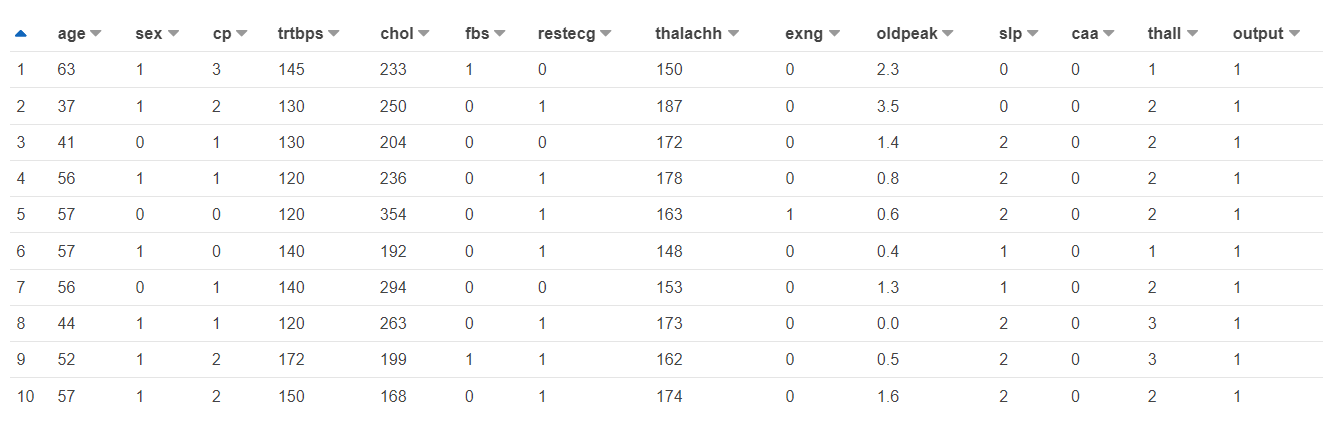

> **Atenção**: Extraia os resultados para o arquivo CSV através do botão de download e renomei-o com o número da query. Voce deve envia-lo para os tutores de EBAC.

### **2.2. Query 2** 

No console do AWS Athena, execute a seguinte query para praticar a função de contagem **COUNT**:

```sql
SELECT COUNT(age) AS QUANTIDADE_LINHAS
FROM heartattack
```

No painel de resultados você deve encontrar o seguinte resultado. Esse resultado nos retorna a informação de quantidas linhas temos na tabela.

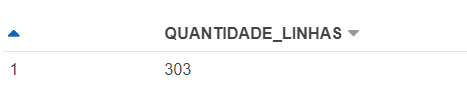

> **Atenção**: Extraia os resultados para o arquivo CSV através do botão de download e renomei-o com o número da query. Voce deve envia-lo para os tutores de EBAC.

### **2.3. Query 3** 

No console do AWS Athena, execute a seguinte query para praticar a função GROUP BY:

```sql
SELECT COUNT(age) AS QUANTIDADE, 
CASE
WHEN output =1 THEN ' more chance of heart attack'
ELSE 'less chance of heart attack'
END AS output
FROM heartattack
GROUP BY output;
```

No painel de resultados você deve encontrar o seguinte resultado.

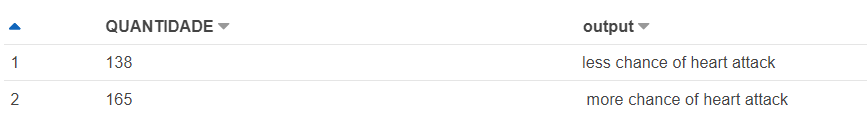

<br>

> **Atenção**: Extraia os resultados para o arquivo CSV através do botão de download e renomei-o com o número da query. Voce deve envia-lo para os tutores de EBAC.

## **3.Funções MIN/MAX/SUM/AVG**



### 3.1 Query 4

No console do AWS Athena, execute a seguinte query para praticar a função GROUP BY:

```sql
SELECT MAX(age), MIN(age), AVG(age), output  
FROM heartattack
GROUP BY output
```

No painel de resultados você deve encontrar o seguinte resultado.
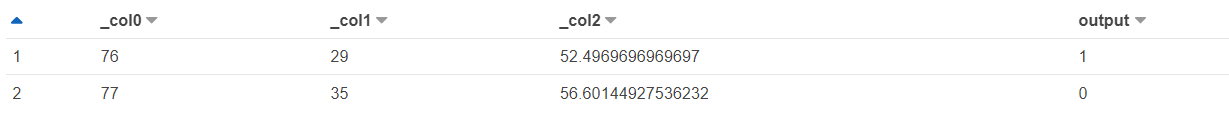

> **Atenção**: Extraia os resultados para o arquivo CSV através do botão de download e renomei-o com o número da query. Voce deve envia-lo para os tutores de EBAC.

### 3.2 Query 5



No console do AWS Athena, execute a seguinte query para praticar a função GROUP BY:

```sql
SELECT MAX(age), MIN(age), AVG(age), output ,sex
FROM heartattack
GROUP BY output, sex;
```

No painel de resultados você deve encontrar o seguinte resultado.
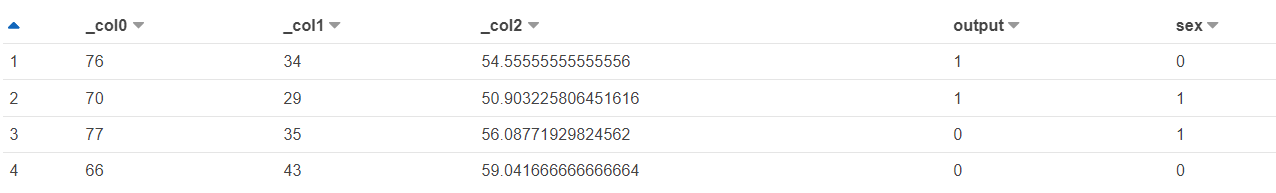



> **Atenção**: Observe a diferença entre os resultados de saída da Query 4 e da Query 5. 

> **Atenção**: Extraia os resultados para o arquivo CSV através do botão de download e renomei-o com o número da query. Voce deve envia-lo para os tutores de EBAC.

## 4. Função HAVING



### 4.1. Query 6

No console do AWS Athena, execute a seguinte query para praticar a função HAVING:

```sql
SELECT COUNT(output), output, sex 
FROM heartattack
GROUP BY output, sex
having COUNT(output) > 25
```

No painel de resultados, verifique a saída:
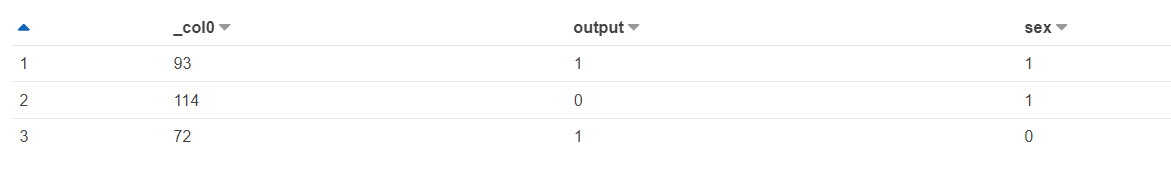

> **Atenção**: Extraia os resultados para o arquivo CSV através do botão de download e renomei-o com o número da query. Voce deve envia-lo para os tutores de EBAC.